## Converting an image into its ASCII version

In [53]:
from PIL import Image
#ASCII_CHARS = ["B","S","#","&","@","$","%","*","!",":","."]# printing the image using all these characters
ASCII_CHARS = ['0','1'] # printing only using 0's and 1's
def scale_image(image, W_New=100):
    """To Resize an image preserving the aspect ratio.
    """
    (W, H) = image.size
    aspect_ratio = H/float(W)
    H_New = int(aspect_ratio * W_New)
    new_image = image.resize((W_New, H_New))
    return new_image

We can modify the ASCII character array with the symbols we want in our image, but we need to modify the range width in the map_pixels_to_ascii_chars function based on the number of values in the array. 

Converting the image to greyscale

In [54]:
def convert_to_grayscale(image):
    return image.convert('L')

Mapping the image pixels to corresponding ascii characters

In [55]:
def map_pixels_to_ascii_chars(image, range_width=128):
    """Maps each pixel to an ascii char based on the range
    in which it lies.
0-255 is divided into 11 ranges of 25 pixels each.
        """
    pixels_in_image = list(image.getdata())
    pixels_to_chars = [ASCII_CHARS[int(pixel_value/range_width)] for pixel_value in
                pixels_in_image]
    return "".join(pixels_to_chars)

Converting the image to ASCII by assigning the pixes to ASCII characters based on their intensity

In [56]:
def convert_image_to_ascii(image, W_New=100):
    image = scale_image(image)
    image = convert_to_grayscale(image)
    pixels_to_chars = map_pixels_to_ascii_chars(image)
    len_pixels_to_chars = len(pixels_to_chars)
    image_ascii = [pixels_to_chars[index: index + W_New] for index in range(0, len_pixels_to_chars, W_New)]
    return "\n".join(image_ascii)
    print(pixels_to_chars)


Here is the wrapper/main function which takes in the file path to open the image and print the ASCII image

In [57]:
from scipy import sparse
from scipy.sparse import coo_matrix
import sklearn.feature_extraction.image as image
def handle_image_conversion(image_filepath):
    image = None
    try:
        image = Image.open(image_filepath)
    except Exception as e:
        print ("Unable to open image file {image_filepath}".format(image_filepath=image_filepath))
        print (e)
        return
    image_ascii = convert_image_to_ascii(image)
    print(image_ascii)
    
    # writing the image to a text file and saving it
    with open("data/ascii_image.txt", "w") as f:
        f.write(image_ascii)
        

Setting the image file path and calling our main function

In [58]:
    image_file_path = 'ipynb.images/MyProfile.jpg'
    handle_image_conversion(image_file_path)

1111111111111111111111111111111111111110000001111111111111111011100111000000010000000000111111111111
1111111111111111111111111111111111011110011101011111111111100000111111000000001000000000011111111111
1111111111111111111111111111111111111000000111110101111110100000000011110001000000000000011111111111
1111111111111111111111111111111111111111100001100111111110000000000000001110000111100000001111111111
1111111111111111111111111111111111111111111111110000111111000000000000000001000101111110111111111111
1111111111111111111111111111111111111111111111111100111000111110000000000000000001111111111111111111
1111111111111111111111111111111111111111111111011001111110111000111000000000000001111111111111111111
1111111111111111111111111111011011111100110111000000111111111100111000110011010001111111111111111111
1111111111111111111111111111101011111110001111000001111111111111111000100000010101111111111111111111
1111111111111111111111111111100111110110100000000001111111000110111111111100000101111111111

The image is also saved as áscii_image.txt file

## Bonus - 
** My Approach is described as below** 

## Finding the adjacency matrix for the image 

**S1** - Converting the returned image_ascii into graph by converting the saved text file into a 2d matrix and creating a grpah from the numpy array 

**S2** - Will convert the graph into GML format using 'write_gml'

**S3** - Will load the gml file and find the Adjacency matrix using networkx using 'nx.to_scipy_sparse_matrix function'

Lets start with step 1 ( **S1**)


In [59]:
##  this function just returns the ascii image and the text file is saved
def getascii_image_conversion(image_filepath):
    image = None
    try:
        image = Image.open(image_filepath)
    except Exception as e:
        print ("Unable to open image file {image_filepath}".format(image_filepath=image_filepath))
        print (e)
        return
    image_ascii = convert_image_to_ascii(image)
    return image_ascii


In [60]:
import PIL
import numpy as np
filepath = 'ipynb.images/MyProfile.jpg'
image_ascii = getascii_image_conversion(filepath) # calling the function 

## Adding white spaces between each element in the text file
string_revised=" ".join(image_ascii)

# Writing this string into a text file
text_file = open("data/ascii_image.txt", "w")
n = text_file.write(string_revised)
text_file.close()


# creating the 2D  np array 
with open("data/ascii_image.txt") as textFile:
    lines = [line.split() for line in textFile]

# Converting the string objects inside the list to integers   
newList = []
listSize = len(lines)
for i in range(0, listSize):
    newList.append([])
    for j in range(0, listSize):
        newList[i].append(int(lines[i][j]))
    
# getting the 2Darray 
matrix = np.asarray(newList)


## 100*100 matrix of the image

print(matrix.shape)
print (matrix)
type(matrix)


(100, 100)
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


numpy.ndarray

**S2**  - Converting into GML format by creating the graph and using the networkx write funtion

In [61]:
import networkx as nx

G=nx.from_numpy_matrix(matrix)
nx.write_gml(G,'data/image.gml')


 **S3**-  Next steps would be to load the gml data and find the adjaceny matrix 

In [62]:
import networkx as nx
image = nx.read_gml('data/image.gml')


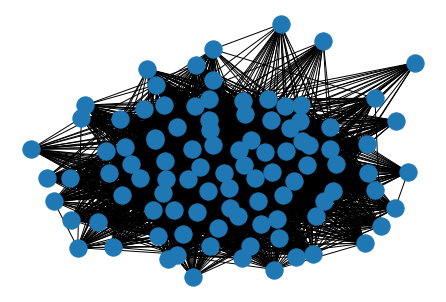

In [63]:
import matplotlib as pl
nx.draw(image,pos=nx.spring_layout(image))

**So here is the 100 by 100 adjacency mattrix of my ASCII image**

In [64]:
import numpy as np
import pandas as pd
from scipy import sparse
import scipy.sparse.linalg
Adj = nx.to_scipy_sparse_matrix(image)
Adj.todense()


matrix([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 0, ..., 1, 1, 1],
        [1, 0, 0, ..., 0, 1, 0],
        ...,
        [1, 1, 0, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 0, ..., 1, 1, 0]], dtype=int32)

In [65]:
pd.DataFrame(Adj.todense())

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
1,1,1,0,1,1,0,1,1,1,1,...,1,1,0,1,0,0,1,1,1,1
2,1,0,0,1,1,1,1,1,1,0,...,0,0,1,1,1,0,1,0,1,0
3,1,1,1,0,0,1,0,0,0,1,...,1,1,0,0,0,1,0,1,1,1
4,1,1,1,0,0,0,0,0,0,1,...,1,1,1,0,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,1,1,0,1,0,1,0,...,0,0,1,1,1,0,1,1,1,1
96,0,1,1,0,0,0,1,0,0,1,...,0,0,1,0,1,1,0,1,1,1
97,1,1,0,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
98,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,0,1,1,1,1,1


Lets obtain degrees, and build a diagonal matrix with each $(i,i)$ node containing the inverse of the degree for that node:

In [66]:
np.seterr(divide='ignore')  # ignore division-by-zero errors

degrees = np.ravel(Adj.sum(axis=1))
Deginv = sparse.diags(1 / degrees).tocsr()

**Plotting the matrix**

In [67]:
## Matrix plotting function

import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(10, 5))
    # you may have to replace 'axisbg' below with 'facecolor', depending on the version of your matplotlib
    ax = fig.add_subplot(111, facecolor='black') #axisbg='b')
    ax.plot(m.col, m.row, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

The diagonal matrix plot

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


<Figure size 432x288 with 0 Axes>

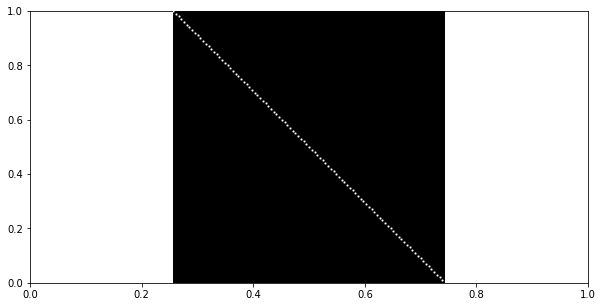

In [68]:
m = sparse.diags(1 / degrees).tocoo()
ax = plot_coo_matrix(m)
ax.figure.show()

And our adjacent matrix

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


<Figure size 432x288 with 0 Axes>

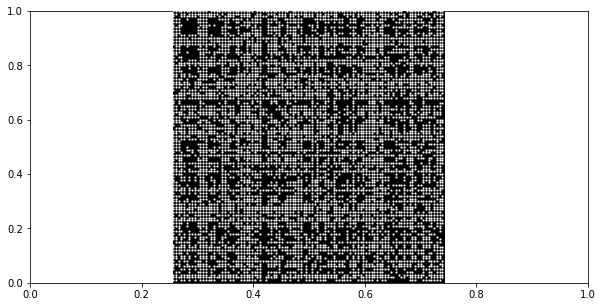

In [69]:
A = Adj.tocoo()
ax = plot_coo_matrix(A)
ax.figure.show()

For ASCII style with degrees on right margin

In [70]:
dense = Adj.todense()
for i in range(100):
    for row in dense[i]:
        numbers =[ np.vectorize(np.int)(x) for x in row ]
        degrees = np.sum(numbers)
        print(''.join(str(i) for i in numbers).replace(' ', '').replace('\n', '') + ' ' + str(degrees))

[[1111111111111011111111111111110111111111111011111111111111111111111111111111111111111011111111110111]] 95
[[1101101111111111101011111111100110011101110111111111011011111001111011111110111101011101111101001111]] 78
[[1001111110111111010111100111101111100111110110101111011111011000101010111111011111100101110011101010]] 70
[[1110010001111000011110111101011110011110011111110000111111111110011100011110111001011111111100010111]] 67
[[1110000001111000000110011011111110011011001111110000010011010110011100111111110000110111101110110111]] 59
[[1011000000111101000100000111101000010001101000100011010000000000100001100101011100000100110011100110]] 38
[[1110000001011000001111011001011010011111001111110001010010110110011100011110110001111111101100111111]] 59
[[1110000001111000001100001000011110011111001111010001100010010000001000111110110000100001100000100110]] 42
[[1110000001111000001110001011111110011011001111010000010011010110011100111011110000110011101010110111]] 55
[[11011011101110100001011001